In [472]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [473]:
ATTACK_TARGET = "02"
TARGET_TYPE = "SUB" # MAIN: メインの攻撃, SUB: 予備選の攻撃, UTIL100: Utility100の攻撃
# MAIN = False # True: メインの攻撃, False: 予備選の攻撃

DIR = ""
if TARGET_TYPE == "MAIN":
    DIR = "../data"
elif TARGET_TYPE == "SUB":
    DIR = "../predata/anonymization_data"
elif TARGET_TYPE == "UTIL100":
    DIR = "../samples/util100"
    ATTACK_TARGET = "36"

"""
01	宮地研.exe
02	私達日本語本当下手
03	ポップコーン
04	Hots
05	SHA-NES
06	神ぼ大νττ
07	たけのこ映画守り隊
08	0xA
09	ステテコ泥棒
10	動的計画法
11	Gunmataro117
12	HAL
14	privocy
15	ES5 →多数決で陥落？
16	佐古研究室
17	こそっとアタック、しれっとブロック
18	匿名アノニマス
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	春日部防衛隊（かすかべ防衛隊）
"""

'\n01\t宮地研.exe\n02\t私達日本語本当下手\n03\tポップコーン\n04\tHots\n05\tSHA-NES\n06\t神ぼ大νττ\n07\tたけのこ映画守り隊\n08\t0xA\n09\tステテコ泥棒\n10\t動的計画法\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 →多数決で陥落？\n16\t佐古研究室\n17\tこそっとアタック、しれっとブロック\n18\t匿名アノニマス\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\t春日部防衛隊（かすかべ防衛隊）\n'

In [474]:
# fmt: off
ALL_HEADER = ['Name', 'Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',  # noqa: E501
                      '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',  # noqa: E501
                      '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',  # noqa: E501
                      '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',  # noqa: E501
                      '3877', '3889'] # noqa

B_HEADERS_LIST = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

B_USER_ATTRIBUTE_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

B_REVIEW_HEADERS_LIST = [
  ['260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['247', '1920', '2017', '2087'],  # noqa: E501
  ['260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

MOVIE_IDS = ['2', '56', '247', '260', '653', '673', '810', '885', '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253', '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489', '3877', '3889']
# fmt: on

### Cデータの読み取り

In [475]:
from os import listdir

#c0~c9に対するdfのリスト
c_data_list = []

files = listdir(DIR)

for i in range(10):
    file = None
    for f in files:
        if f.startswith(f"C{ATTACK_TARGET}_{i}"):
            file = f
            break
    if file is None:
        print(f)
        raise("File not found")
    c_data = pd.read_csv(f"{DIR}/C{ATTACK_TARGET}_{i}.csv")
    c_data_list.append(c_data)

c_data_list[0]

,Gender,Age,Occupation,ZIP-code,260,653,1525,2105,2193,2253,2628,2872,3438,3439,3440,3877,3889
0,F,18,4,84,2,1,2,1,1,5,0,2,5,2,1,1,3
1,M,1,4,396,5,5,1,5,2,5,0,3,0,4,0,1,0
2,M,35,7,274,4,3,0,5,4,1,3,2,5,1,3,4,3
3,F,45,20,282,3,0,0,0,1,0,0,0,0,4,0,0,0
4,F,45,13,312,3,1,3,5,2,2,5,3,1,3,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,25,15,301,3,0,0,0,0,4,4,4,5,0,1,2,0
9996,F,35,18,940,3,0,0,0,5,4,3,0,0,3,0,0,5
9997,M,45,8,837,5,0,2,0,0,0,2,3,0,0,0,1,3
9998,M,18,9,201,2,4,0,2,0,0,0,0,3,0,0,0,0


### Ba, Bbの読み込み

In [476]:
Ba = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}a.csv")
Ba.head()

,Name,Gender,Age,Occupation,ZIP-code
0,Florie Lintall,F,18,17,373
1,Ring Delouch,M,50,12,826
2,Christos Morkham,M,50,0,180
3,Wye Zanutti,M,18,12,307
4,De witt Kertess,M,35,17,452


In [477]:
Bb = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}b.csv")
Bb.head()

,2,56,247,260,653,673,810,885,1009,1073,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,3,0,2,1,0,3,0,2,0,2,...,1,2,3,4,0,2,0,3,5,2
1,0,0,2,1,3,2,3,0,1,2,...,2,0,4,0,5,0,0,0,0,4
2,0,1,0,1,1,1,0,0,4,0,...,4,0,0,0,0,0,2,5,0,0
3,0,0,1,5,0,1,0,2,0,0,...,3,0,3,0,*,0,0,5,3,5
4,3,0,0,5,0,0,0,4,0,4,...,4,0,2,0,3,0,2,0,0,0


### 攻撃に利用するGAOZと映画のIDの全ペア

In [478]:
import itertools

cross_tab_pairs = []

pairs_set = set()
for b_review_headers in B_REVIEW_HEADERS_LIST:
    for pair in itertools.combinations(b_review_headers, 2):
        pairs_set.add(pair)

for pair in itertools.combinations(MOVIE_IDS, 2):
    if pair in pairs_set:
        cross_tab_pairs.append(pair)

print(f"ペアの数: {len(cross_tab_pairs)}")
cross_tab_pairs[:5]

ペアの数: 607


[('2', '56'), ('2', '260'), ('2', '653'), ('2', '673'), ('2', '810')]

### C0~C9の各cross集計の平均をとる

In [479]:
# 1. c0からc9までのデータを結合
combined_data = pd.concat(c_data_list, ignore_index=True)
combined_data.astype("category")
for col in MOVIE_IDS:
    combined_data[col] = pd.Categorical(combined_data[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)


# 2. cross_tab_pairsごとにクロス集計を行う
cross_tabs = {}
for movie_id_i, movie_id_j in cross_tab_pairs:
    cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='all')
    cross_tabs[(movie_id_i, movie_id_j)] = cross_tab

cross_tabs[("260", "2174")]

2174,0,1,2,3,4,5
260,,,,,,
0,0.0213,0.0139,0.0168,0.0149,0.0201,0.0122
1,0.0279,0.0184,0.0205,0.0204,0.0225,0.0172
2,0.0178,0.0139,0.0157,0.0173,0.0175,0.0113
3,0.0312,0.0253,0.0293,0.0256,0.0303,0.0207
4,0.0350,0.0254,0.0241,0.0286,0.0294,0.0198
5,0.0698,0.0405,0.0564,0.0672,0.0790,0.0428


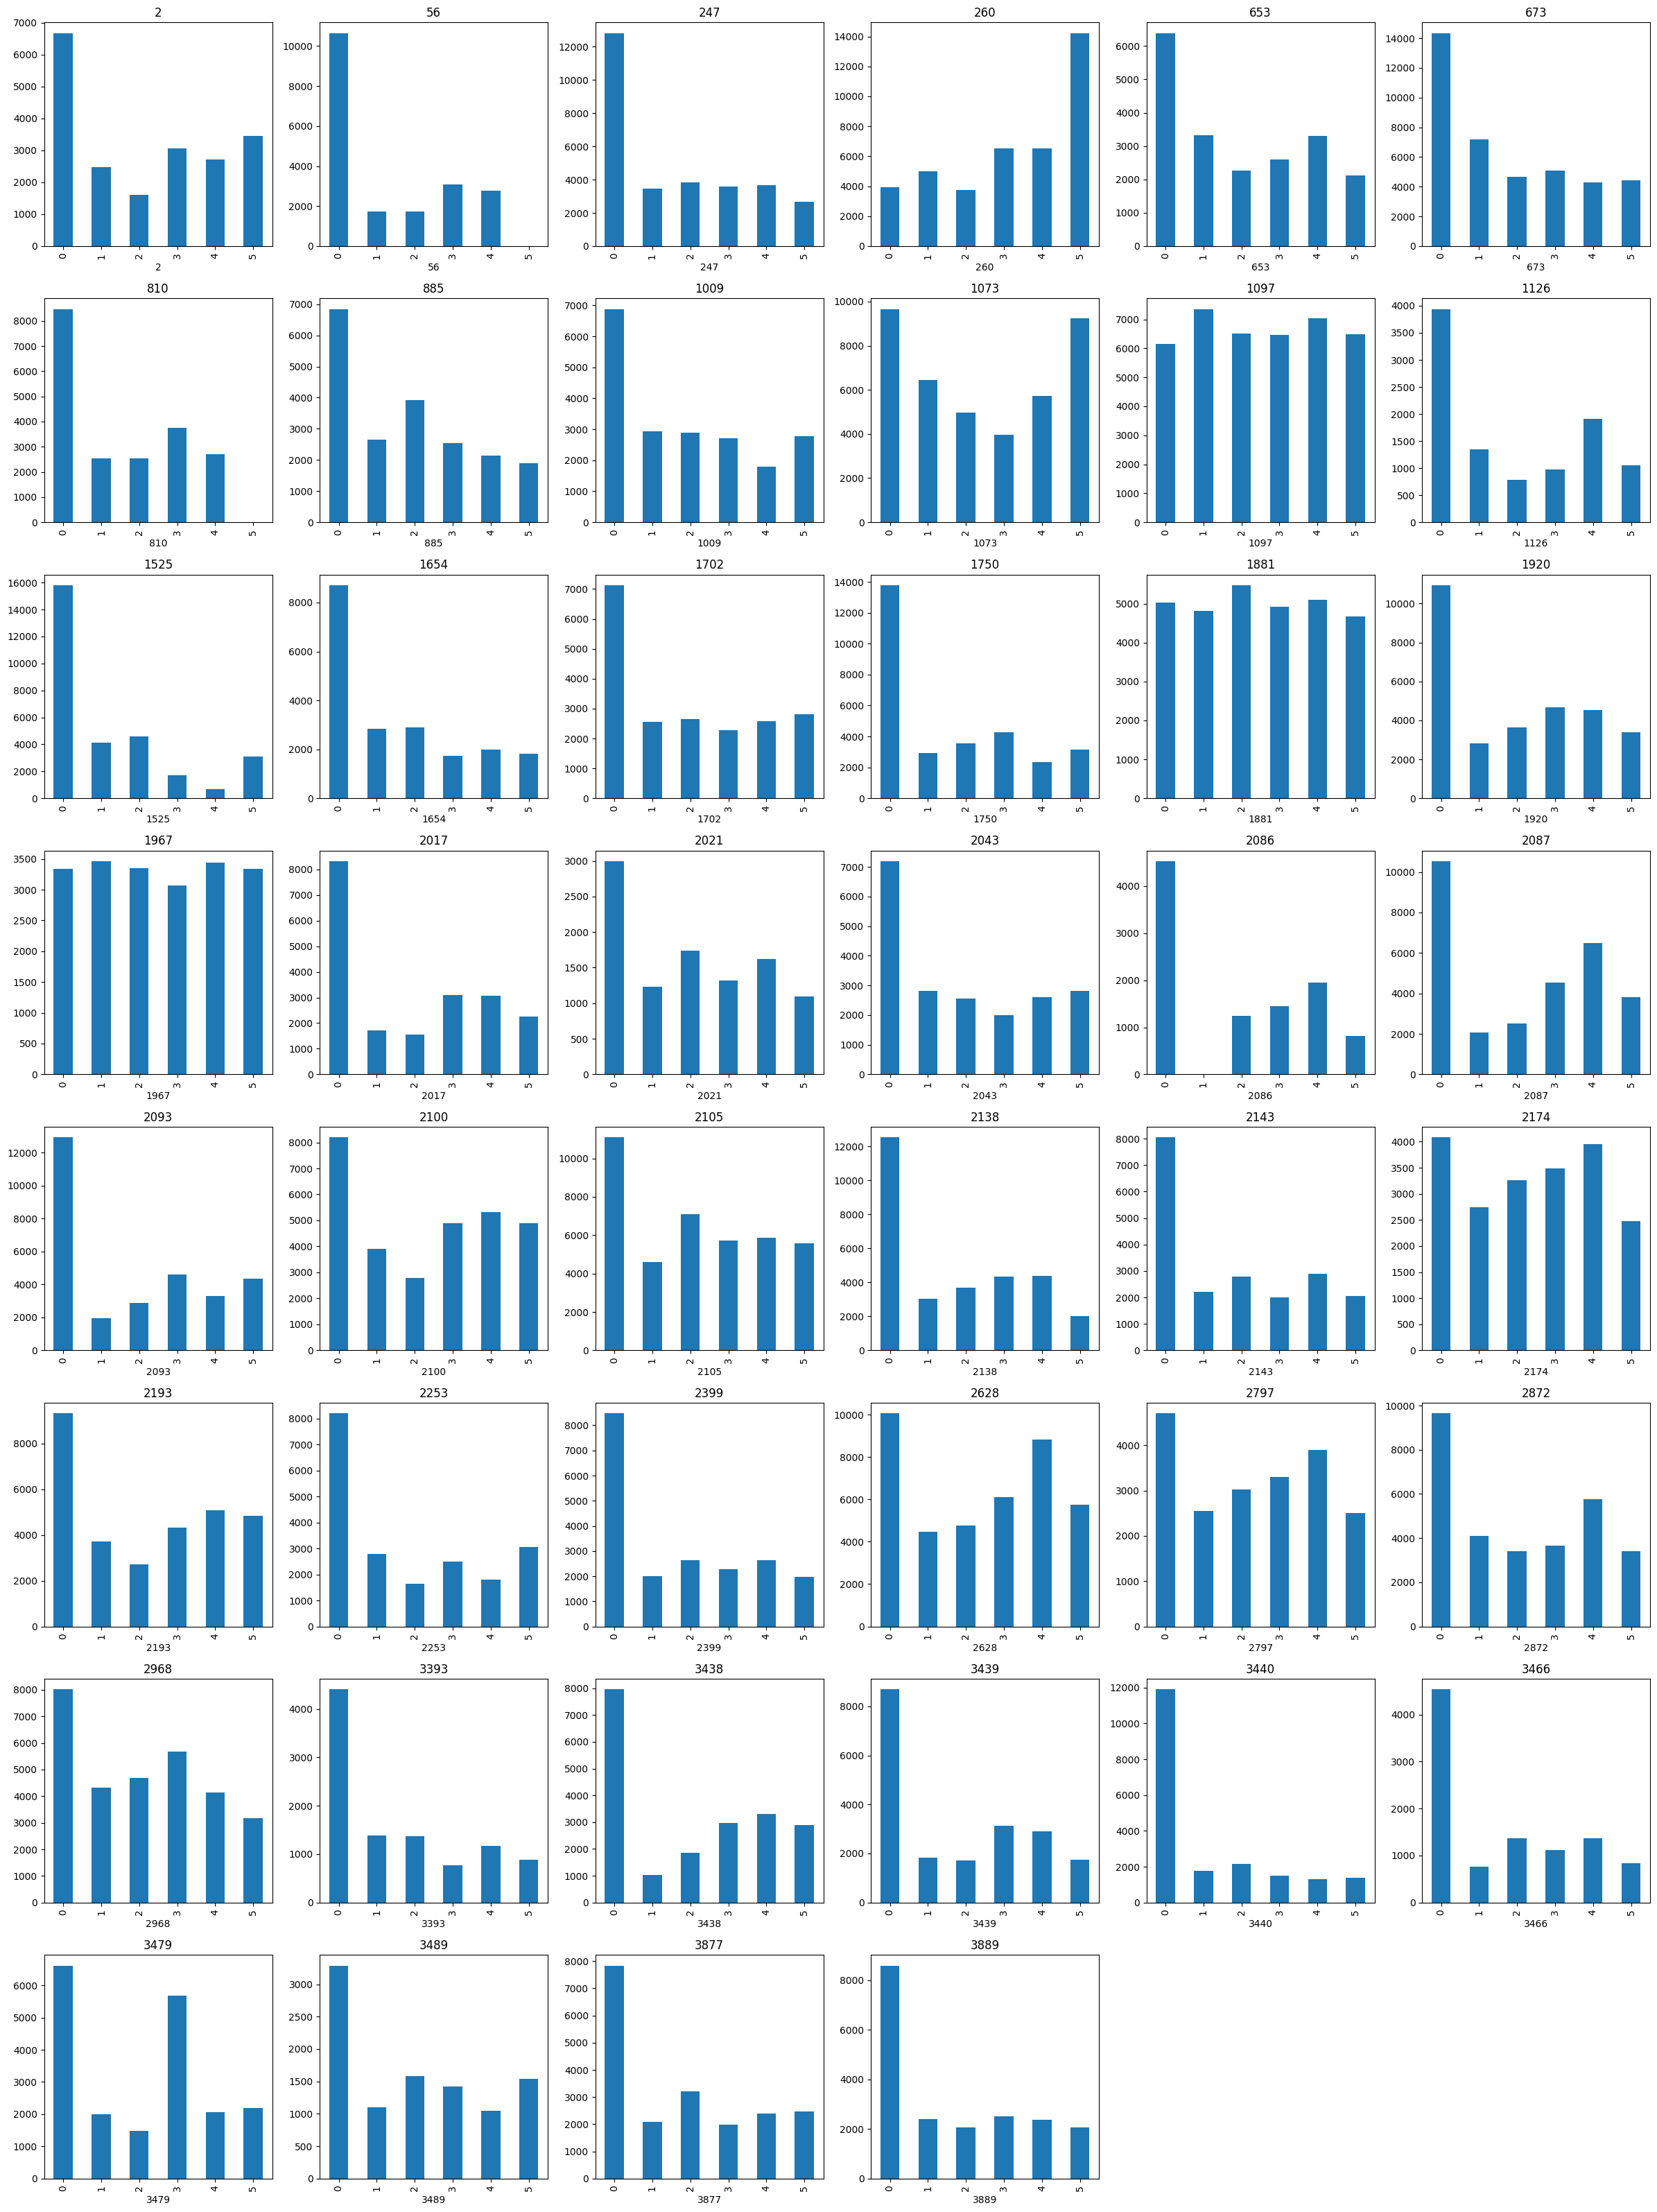

In [480]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# combined_dataが既に定義されていると仮定します

# カラムの総数を取得
num_cols = len(MOVIE_IDS)
# 列数を6に設定
num_per_row = 6
# 必要な行数を計算
num_rows = int(np.ceil(num_cols / num_per_row))

# サブプロットを作成
fig, axes = plt.subplots(nrows=num_rows, ncols=num_per_row, figsize=(24, num_rows * 4))
axes = axes.flatten()

# # 各カラムに対して棒グラフを描画
for i, col in enumerate(MOVIE_IDS):
    value_counts = combined_data[col].value_counts().sort_index()
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

# 余ったサブプロットを削除
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 正規のMAE ATTACK

In [481]:
# target_Bb_row_index = 0

result_list = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # TODO:　ここの実装が複雑なので後ほど問題ないか確認する
    # 各映画IDに対する target_cross を格納するリスト
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        paired_movie_id = None
        if hidden_movie_id == movie_id_i:
            paired_movie_id = movie_id_j
            # 転置する
            cross_tab = cross_tab.T
        else:
            paired_movie_id = movie_id_i
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[paired_movie_id]

        column_sums = cross_tab.sum()
        # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
        normalization_factors = (1/6) / column_sums
        # データフレームの各値に正規化係数を適用
        normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = normalized_cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)

    # 各カラムごとに総和が1になるように確率を正規化
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # クロス集計表を列ごとに正規化
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    # hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.sum(axis=1)
    # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    # probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)
    # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    # probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    result_list.append(hidden_movie_probabilities.sort_values(ascending=False).index[0])

result_list = pd.Series(result_list).values
result_list

array([4, 0, 0, 0, 0, 2, 5, 1, 1, 0, 0, 0, 0, 0, 0, 2, 5, 4, 1, 0, 0, 5,
       2, 0, 4, 1, 0, 1, 1, 0, 0, 5, 5, 0, 4, 3, 5, 5, 0, 0, 0, 0, 1, 3,
       2, 0, 1, 0, 2, 0])

In [482]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if TARGET_TYPE == "SUB" or TARGET_TYPE == "UTIL100":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[4 0 0 0 0 1 2 0 4 1 2 0 0 0 1 2 4 4 2 0 5 5 0 0 4 2 0 1 1 0 0 1 5 0 4 5 0
 5 0 2 0 5 1 0 0 0 1 0 2 3]
[np.int64(4), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(5), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(5), np.int64(4), np.int64(1), np.int64(0), np.int64(0), np.int64(5), np.int64(2), np.int64(0), np.int64(4), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(5), np.int64(5), np.int64(0), np.int64(4), np.int64(3), np.int64(5), np.int64(5), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(3), np.int64(2), np.int64(0), np.int64(1), np.int64(0), np.int64(2), np.int64(0)]


マッチングの成功率: <span style='color:yellow'>30</span> / 50

In [483]:
count_0 = my_answer.count(0)

printmd(f"0の数: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"🚨 <span style='color:yellow'>0が30以上です</span>")

0の数: <span style='color:green'>24</span>

## MAE ATTACK + ゴミ方式

In [484]:
MAX_0_COUNT = 28

answer_df = pd.DataFrame(index=range(50), columns=["Answer", "0_Prob", "NoCondition0", "MaxOther0"])

prob_0 = []
max_other_0 = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # TODO:　ここの実装が複雑なので後ほど問題ないか確認する
    # 各映画IDに対する target_cross を格納するリスト
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        paired_movie_id = None
        if hidden_movie_id == movie_id_i:
            paired_movie_id = movie_id_j
            # 転置する
            cross_tab = cross_tab.T
        else:
            paired_movie_id = movie_id_i
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[paired_movie_id]

        column_sums = cross_tab.sum()
        # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
        normalization_factors = (1/6) / column_sums
        # データフレームの各値に正規化係数を適用
        normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = normalized_cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)

    # 各カラムごとに総和が1になるように確率を正規化
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # クロス集計表を列ごとに正規化
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)
    
    prob_0.append(hidden_movie_probabilities[0])

    max_other_index = hidden_movie_probabilities.iloc[1:].idxmax()
    max_other_0.append(max_other_index)

answer_df["0_Prob"] = prob_0
answer_df["MaxOther0"] = max_other_0
# 0_Probの上位MAX_0_COUNTを求める
top_0_probs = answer_df.nlargest(MAX_0_COUNT, "0_Prob")
# NoCondition0を設定
answer_df["NoCondition0"] = False
answer_df.loc[top_0_probs.index, "NoCondition0"] = True

# Answerを決定
answer_df["Answer"] = np.where(answer_df["NoCondition0"], 0, answer_df["MaxOther0"])


result_list = answer_df["Answer"].values
result_list

array([4, 0, 0, 0, 0, 2, 5, 0, 1, 0, 0, 0, 0, 0, 0, 2, 5, 4, 0, 0, 0, 5,
       2, 0, 0, 1, 0, 1, 1, 0, 0, 5, 5, 0, 4, 3, 5, 5, 0, 0, 0, 0, 1, 3,
       2, 0, 1, 0, 0, 0])

In [485]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if TARGET_TYPE == "SUB" or TARGET_TYPE == "UTIL100":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[4 0 0 0 0 1 2 0 4 1 2 0 0 0 1 2 4 4 2 0 5 5 0 0 4 2 0 1 1 0 0 1 5 0 4 5 0
 5 0 2 0 5 1 0 0 0 1 0 2 3]
[np.int64(4), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(5), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(5), np.int64(4), np.int64(0), np.int64(0), np.int64(0), np.int64(5), np.int64(2), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(5), np.int64(5), np.int64(0), np.int64(4), np.int64(3), np.int64(5), np.int64(5), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(3), np.int64(2), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0)]


マッチングの成功率: <span style='color:yellow'>29</span> / 50

In [486]:
count_0 = my_answer.count(0)

printmd(f"0の数: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"🚨 <span style='color:yellow'>0が30以上です</span>")

0の数: <span style='color:green'>28</span>

## ゴミ方式をガチでランダムでやったらどうなるのか調査

In [487]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
import random

def printmd(string):
    display(Markdown(string))

my_answer = []
for _ in range(28):
    my_answer.append(0)
for _ in range(22):
    my_answer.append(random.choice([1, 2, 3, 4, 5]))

np.random.shuffle(my_answer)

if TARGET_TYPE == "SUB" or TARGET_TYPE == "UTIL100":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[4 0 0 0 0 1 2 0 4 1 2 0 0 0 1 2 4 4 2 0 5 5 0 0 4 2 0 1 1 0 0 1 5 0 4 5 0
 5 0 2 0 5 1 0 0 0 1 0 2 3]
[0, 0, 2, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 5, 0, 0, 1, 5, 0, 2, 0, 5, 0, 0, 3, 0, 2, 1, 0, 3, 0, 0, 0, 3, 0, 3, 4, 5, 0, 5, 0, 0, 1, 2, 0, 3, 5, 0, 1, 0]


マッチングの成功率: <span style='color:yellow'>18</span> / 50

### ベイズ推定を利用した穴埋め

In [488]:
def grade_predictions(result_list, method_name):
    from IPython.display import Markdown, display

    def printmd(string):
        display(Markdown(string))

    # 0 の数をカウント
    count_0 = result_list.count(0)
    printmd(f"**{method_name} の予測結果：**")
    printmd(f"0の数: <span style='color:green'>{count_0}</span>")
    if count_0 >= 30:
        printmd(f"🚨 <span style='color:red'>0が30以上です</span>")

    # 正解データの読み込み
    # DIR と ATTACK_TARGET は適切に定義されているものとします
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values
    
    print(X_ANSWER)
    print(np.array(result_list))

    # 予測結果と正解データを比較
    matched_count = sum([1 for i in range(len(result_list)) if result_list[i] == X_ANSWER[i]])
    # 結果を表示
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / {len(result_list)}")
    print("\n")

In [489]:
# 既存のクロス集計表を使用するか、新たに作成
# 映画ごとの評価値の分布を計算（事前確率）
rating_priors = {}
for movie_id in MOVIE_IDS:
    rating_counts = combined_data[movie_id].value_counts(normalize=True).sort_index()
    rating_priors[movie_id] = rating_counts

# 映画のペアごとにクロス集計表を作成し、P(観測された評価 | 欠損した評価)を計算
cross_tabs = {}
for movie_id_i, movie_id_j in cross_tab_pairs:
    # cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='columns')
    # cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='index')
    cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j])
    cross_tabs[(movie_id_i, movie_id_j)] = cross_tab

In [490]:
# デバッグ用の行番号
target_Bb_row_index = 2

# Bbの指定したユーザーに対して、欠損した評価値を予測
target_Bb_row = Bb.iloc[target_Bb_row_index]

# 欠損した映画IDを特定
hidden_movie_id = None
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] == "*":
        hidden_movie_id = movie_id
        break

print(f"欠損した映画ID：{hidden_movie_id}\n")

# 観測された評価値を収集
observed_ratings = {}
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] != "*" and movie_id != hidden_movie_id:
        observed_ratings[movie_id] = int(target_Bb_row[movie_id])

print(f"観測された評価値：{observed_ratings}\n")

for movie_id_i, movie_id_j in cross_tab_pairs:
    if movie_id_i == hidden_movie_id or movie_id_j == hidden_movie_id:
        print(cross_tabs[(movie_id_i, movie_id_j)])
        break

欠損した映画ID：2017

観測された評価値：{'2': 0, '56': 1, '247': 0, '260': 1, '653': 1, '673': 1, '810': 0, '885': 0, '1009': 4, '1073': 0, '1097': 5, '1126': 0, '1525': 0, '1654': 5, '1702': 0, '1750': 0, '1881': 4, '1920': 0, '1967': 5, '2021': 4, '2043': 3, '2086': 0, '2087': 5, '2093': 3, '2100': 1, '2105': 4, '2138': 1, '2143': 3, '2174': 0, '2193': 2, '2253': 0, '2399': 0, '2628': 5, '2797': 2, '2872': 1, '2968': 4, '3393': 0, '3438': 0, '3439': 0, '3440': 0, '3466': 0, '3479': 2, '3489': 5, '3877': 0, '3889': 0}

2017     0    1    2    3    4    5
2                                  
0     1697  230  210  511  407  285
1      415  124  109  204  223  162
2      269   80   77  137  143   98
3      601  145  120  237  259  174
4      468  136  133  209  231  178
5      730  138  128  253  264  215


In [491]:
# 欠損した評価値の事後確率を計算
log_posterior = np.log(rating_priors[hidden_movie_id].copy() + 1e-8)  # ラプラススムージング
print(f"初期の対数事後確率（事前確率の対数）：\n{log_posterior}\n")

# 対数尤度を指数関数で戻して正規化（いらない）
log_posterior -= log_posterior.max()
posterior = np.exp(log_posterior)
posterior /= posterior.sum()
print(f"初期の正規化事後確率\n{posterior}\n")

初期の対数事後確率（事前確率の対数）：
2017
0   -0.877190
1   -2.462167
2   -2.556188
3   -1.864330
4   -1.877317
5   -2.178599
Name: proportion, dtype: float64

初期の正規化事後確率
2017
0    0.41595
1    0.08525
2    0.07760
3    0.15500
4    0.15300
5    0.11320
Name: proportion, dtype: float64



In [492]:
# 各観測された評価値について対数事後確率を更新
for observed_movie_id, observed_rating in observed_ratings.items():
    print(f"MovieID：{observed_movie_id}, 評価値：{observed_rating}")

    # クロス集計表を取得
    if (hidden_movie_id, observed_movie_id) in cross_tabs:
        cross_tab = cross_tabs[(hidden_movie_id, observed_movie_id)]
    elif (observed_movie_id, hidden_movie_id) in cross_tabs:
        cross_tab = cross_tabs[(observed_movie_id, hidden_movie_id)]
        cross_tab = cross_tab.T  # 転置
    else:
        print("クロス集計表が見つかりません。スキップします。\n")
        continue
    print(f"正規化前のクロス集計表：\n{cross_tab}\n")
    # 正規化（行方向に正規化して P(観測された評価値 | 隠れた評価値) を得る）
    cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)
    print(f"正規化後のクロス集計表：\n{cross_tab}\n")
    
    # 観測された評価値に対する条件付き確率を取得
    if observed_rating in cross_tab.columns:
        P_observed_given_hidden = cross_tab[observed_rating].copy()
    else:
        P_observed_given_hidden = pd.Series(1e-8, index=log_posterior.index)  # スムージング

    print(f"条件付き確率 P(Rating={observed_rating} | 隠れた評価値)：\n{P_observed_given_hidden}\n")

    # 対数事後確率を更新
    log_posterior += np.log(P_observed_given_hidden + 1e-8)
    print(f"更新後の対数事後確率：\n{log_posterior}\n")

# 対数尤度を指数関数で戻し、正規化
log_posterior -= log_posterior.max()  # オーバーフロー対策
posterior = np.exp(log_posterior)
posterior /= posterior.sum()
print(f"最終的な事後確率（正規化済み）：\n{posterior}\n")

# 事後確率が最大の評価値を予測値とする
predicted_rating = posterior.idxmax()
print(f"予測された評価値：{predicted_rating}")

MovieID：2, 評価値：0
正規化前のクロス集計表：
2        0    1    2    3    4    5
2017                               
0     1697  415  269  601  468  730
1      230  124   80  145  136  138
2      210  109   77  120  133  128
3      511  204  137  237  209  253
4      407  223  143  259  231  264
5      285  162   98  174  178  215

正規化後のクロス集計表：
2            0         1         2         3         4         5
2017                                                            
0     0.405981  0.099282  0.064354  0.143780  0.111962  0.174641
1     0.269637  0.145369  0.093787  0.169988  0.159437  0.161782
2     0.270270  0.140283  0.099099  0.154440  0.171171  0.164736
3     0.329465  0.131528  0.088330  0.152805  0.134752  0.163121
4     0.266536  0.146038  0.093648  0.169614  0.151277  0.172888
5     0.256295  0.145683  0.088129  0.156475  0.160072  0.193345

条件付き確率 P(Rating=0 | 隠れた評価値)：
2017
0    0.405981
1    0.269637
2    0.270270
3    0.329465
4    0.266536
5    0.256295
Name: 0, dtype: float64

更新後の

### 以上の処理をBbの各行に行う

In [493]:
# Bbの各ユーザーに対して、欠損した評価値を予測
# result_list = []
posterior_list = []

for target_Bb_row_index in range(len(Bb)):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    # 欠損した映画IDを特定
    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    observed_ratings = {}
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] != "*" and movie_id != hidden_movie_id:
            observed_ratings[movie_id] = int(target_Bb_row[movie_id])

    # 欠損した評価値の事後確率を計算
    log_posterior = np.log(rating_priors[hidden_movie_id].copy() + 1e-8)  # ラプラススムージング

    for observed_movie_id, observed_rating in observed_ratings.items():
        # クロス集計表を取得
        if (hidden_movie_id, observed_movie_id) in cross_tabs:
            cross_tab = cross_tabs[(hidden_movie_id, observed_movie_id)]
        elif (observed_movie_id, hidden_movie_id) in cross_tabs:
            cross_tab = cross_tabs[(observed_movie_id, hidden_movie_id)].T
        else:
            continue  # クロス集計表がない場合はスキップ

        # 行方向で正規化
        cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)

        for rating in log_posterior.index:
            P_observed_given_hidden = cross_tab.get(observed_rating, pd.Series(1e-8, index=log_posterior.index)).get(rating, 1e-8)
            log_posterior[rating] += np.log(P_observed_given_hidden + 1e-8)  # ラプラススムージング

    # 対数尤度を指数関数で戻し、正規化
    log_posterior -= log_posterior.max()  # オーバーフロー対策
    posterior = np.exp(log_posterior)
    posterior /= posterior.sum()
    print(posterior)
    posterior_series = pd.Series(posterior, index=log_posterior.index)

    # 各ユーザーの posterior をリストに保存
    posterior_list.append(posterior_series)



2143
0    0.086190
1    0.166134
2    0.014620
3    0.164337
4    0.464166
5    0.104554
Name: proportion, dtype: float64
1920
0    0.824711
1    0.012079
2    0.006539
3    0.069965
4    0.062796
5    0.023912
Name: proportion, dtype: float64
2017
0    0.951146
1    0.006895
2    0.006247
3    0.014624
4    0.018388
5    0.002699
Name: proportion, dtype: float64
3440
0    0.973418
1    0.002226
2    0.005919
3    0.007027
4    0.001107
5    0.010304
Name: proportion, dtype: float64
2872
0    0.971792
1    0.003682
2    0.005713
3    0.003812
4    0.007394
5    0.007607
Name: proportion, dtype: float64
247
0    0.348662
1    0.108418
2    0.180692
3    0.143490
4    0.129958
5    0.088781
Name: proportion, dtype: float64
2086
0    1.478043e-01
1    1.294989e-49
2    2.064765e-01
3    1.869826e-01
4    2.884805e-01
5    1.702562e-01
Name: proportion, dtype: float64
3440
0    0.295810
1    0.161862
2    0.029868
3    0.189540
4    0.037665
5    0.285256
Name: proportion, dtype: float64
2

In [494]:
# 各ユーザーのゼロの確率を取得
zero_probabilities = []
for idx, posterior_series in enumerate(posterior_list):
    zero_probability = posterior_series.get(0, 0)
    zero_probabilities.append({'index': idx, 'zero_probability': zero_probability, 'posterior': posterior_series})

# ゼロの確率が高い順に並べ替え
zero_probabilities_sorted = sorted(zero_probabilities, key=lambda x: x['zero_probability'], reverse=True)

# 0に確定するインデックスを取得（最大30個）
zero_indices = [item['index'] for item in zero_probabilities_sorted[:30]]

# 予測結果を格納するリスト
result_list = []

for idx in range(len(Bb)):
    posterior_series = posterior_list[idx]

    if idx in zero_indices:
        predicted_rating = 0
    else:
        # 0以外で最大の事後確率を持つ評価値を予測値とする
        posterior_no_zero = posterior_series.drop(labels=0, errors='ignore')
        if not posterior_no_zero.empty:
            predicted_rating = posterior_no_zero.idxmax()
        else:
            # 0以外の評価値がない場合は0を予測
            predicted_rating = 0
    result_list.append(int(predicted_rating))

# 結果を表示
print(f"予測された評価値（制約を適用）：\n{result_list}")

予測された評価値（制約を適用）：
[4, 0, 0, 0, 0, 0, 4, 0, 5, 0, 0, 0, 0, 0, 0, 2, 5, 0, 1, 0, 0, 5, 2, 0, 4, 4, 0, 0, 1, 0, 0, 5, 5, 0, 4, 3, 5, 5, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0]


In [495]:
# 結果を表示
grade_predictions(result_list, "c_dataを結合してベイズ推定")

**c_dataを結合してベイズ推定 の予測結果：**

0の数: <span style='color:green'>30</span>

🚨 <span style='color:red'>0が30以上です</span>

[4 0 0 0 0 1 2 0 4 1 2 0 0 0 1 2 4 4 2 0 5 5 0 0 4 2 0 1 1 0 0 1 5 0 4 5 0
 5 0 2 0 5 1 0 0 0 1 0 2 3]
[4 0 0 0 0 0 4 0 5 0 0 0 0 0 0 2 5 0 1 0 0 5 2 0 4 4 0 0 1 0 0 5 5 0 4 3 5
 5 0 0 0 0 1 3 0 0 1 0 0 0]


マッチングの成功率: <span style='color:yellow'>29</span> / 50

### ジャンル分けを利用すれば、0に偏る問題を緩和できないか

In [496]:
target_Bb_row_index = 0  # デバッグしたいユーザーの行番号
target_Bb_row = Bb.iloc[target_Bb_row_index]

hidden_movie_id = None
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] == "*":
        hidden_movie_id = movie_id
        break
print(f"ユーザー {target_Bb_row_index} の欠損した映画ID：{hidden_movie_id}")

ユーザー 0 の欠損した映画ID：2143


In [497]:
genres_with_hidden_movie = []
for idx, genre_movie_ids in enumerate(B_REVIEW_HEADERS_LIST):
    if hidden_movie_id in genre_movie_ids:
        genres_with_hidden_movie.append((idx, genre_movie_ids))

if not genres_with_hidden_movie:
    print(f"欠損した映画ID {hidden_movie_id} を含むジャンルが見つかりません。")
else:
    # カラム数が最も多いジャンルを選択
    selected_genre_idx, selected_genre_movie_ids = max(genres_with_hidden_movie, key=lambda x: len(x[1]))
    print(f"選択したジャンルインデックス：{selected_genre_idx}")
    print(f"選択したジャンルの映画IDリスト：{selected_genre_movie_ids}")

選択したジャンルインデックス：1
選択したジャンルの映画IDリスト：['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889']


In [498]:
# 選択したジャンルのデータを取得
selected_genre_df = c_data_list[selected_genre_idx]

# 選択したジャンルの映画IDリスト
selected_movie_ids = selected_genre_movie_ids.copy()

observed_ratings = {}
for movie_id in selected_movie_ids:
    if movie_id != hidden_movie_id and target_Bb_row[movie_id] != "*":
        observed_ratings[movie_id] = int(target_Bb_row[movie_id])

print(f"観測された評価値：{observed_ratings}")


観測された評価値：{'2': 3, '56': 0, '260': 1, '653': 0, '673': 3, '1009': 0, '1073': 2, '1525': 2, '1750': 3, '1881': 1, '1967': 2, '2043': 3, '2093': 3, '2105': 0, '2193': 5, '2399': 0, '2628': 4, '2968': 1, '3479': 0, '3489': 3, '3877': 5, '3889': 2}


In [499]:
rating_priors = selected_genre_df[hidden_movie_id].value_counts(normalize=True).sort_index() + 1e-8  # スムージング
log_posterior = np.log(rating_priors)
print(f"初期の対数事後確率（事前確率の対数）：\n{log_posterior}")

# 対数尤度を指数関数で戻して正規化（いらない）
log_posterior -= log_posterior.max()
posterior = np.exp(log_posterior)
posterior /= posterior.sum()
print(f"初期の正規化事後確率\n{posterior}\n")

初期の対数事後確率（事前確率の対数）：
2143
0   -0.911801
1   -2.218244
2   -1.961836
3   -2.287696
4   -1.932402
5   -2.277892
Name: proportion, dtype: float64
初期の正規化事後確率
2143
0    0.4018
1    0.1088
2    0.1406
3    0.1015
4    0.1448
5    0.1025
Name: proportion, dtype: float64



In [500]:
# クロス集計表の作成と対数事後確率の更新
for observed_movie_id, observed_rating in observed_ratings.items():
    print(f"\n観測された映画ID：{observed_movie_id}, 評価値：{observed_rating}")

    # クロス集計表の作成（正規化は後で行う）
    cross_tab = pd.crosstab(
        selected_genre_df[hidden_movie_id],
        selected_genre_df[observed_movie_id]
    )

    print(f"正規化前のクロス集計表：\n{cross_tab}")

    # 行方向に正規化して条件付き確率を得る
    cross_tab = cross_tab.div(cross_tab.sum(axis=0), axis=1)

    print(f"正規化後のクロス集計表：\n{cross_tab}")

    # 観測された評価値に対する条件付き確率を取得
    if observed_rating in cross_tab.columns:
        P_observed_given_hidden = cross_tab[observed_rating].copy()
    else:
        P_observed_given_hidden = pd.Series(1e-8, index=log_posterior.index)  # スムージング

    print(f"条件付き確率 P(観測された評価値={observed_rating} | 隠れた評価値)：\n{P_observed_given_hidden}")

    # 対数事後確率の更新
    log_posterior += np.log(P_observed_given_hidden + 1e-8)
    print(f"更新後の対数事後確率：\n{log_posterior}")


観測された映画ID：2, 評価値：3
正規化前のクロス集計表：
2        0    1    2    3    4    5
2143                               
0     1678  406  215  546  477  696
1      290  176  102  173  163  184
2      415  188  126  233  201  243
3      272  116  108  163  161  195
4      413  204  154  236  201  240
5      268  140   95  183  164  175
正規化後のクロス集計表：
2            0         1        2         3         4         5
2143                                                           
0     0.502998  0.330081  0.26875  0.355932  0.348939  0.401616
1     0.086930  0.143089  0.12750  0.112777  0.119239  0.106174
2     0.124400  0.152846  0.15750  0.151890  0.147037  0.140219
3     0.081535  0.094309  0.13500  0.106258  0.117776  0.112522
4     0.123801  0.165854  0.19250  0.153846  0.147037  0.138488
5     0.080336  0.113821  0.11875  0.119296  0.119971  0.100981
条件付き確率 P(観測された評価値=3 | 隠れた評価値)：
2143
0    0.355932
1    0.112777
2    0.151890
3    0.106258
4    0.153846
5    0.119296
Name: 3, dtype: float64
更新後の対数事後確率

正規化前のクロス集計表：
1009     0    1    2    3    4    5
2143                               
0     1896  488  466  462  260  446
1      254  201  186  166  101  180
2      379  236  213  200  142  236
3      241  178  167  171  104  154
4      379  226  243  204  159  237
5      296  135  173  158  128  135
正規化後のクロス集計表：
1009         0         1         2         3         4         5
2143                                                            
0     0.550363  0.333333  0.321823  0.339456  0.290828  0.321326
1     0.073730  0.137295  0.128453  0.121969  0.112975  0.129683
2     0.110015  0.161202  0.147099  0.146951  0.158837  0.170029
3     0.069956  0.121585  0.115331  0.125643  0.116331  0.110951
4     0.110015  0.154372  0.167818  0.149890  0.177852  0.170749
5     0.085922  0.092213  0.119475  0.116091  0.143177  0.097262
条件付き確率 P(観測された評価値=0 | 隠れた評価値)：
2143
0    0.550363
1    0.073730
2    0.110015
3    0.069956
4    0.110015
5    0.085922
Name: 0, dtype: float64
更新後の対数事後確率：
2143
0    

### Bbの全行で

In [501]:
# 結果を保存するリスト
posterior_list = []

# Bbの各ユーザーに対して処理を行う
for target_Bb_row_index in range(len(Bb)):
    target_Bb_row = Bb.iloc[target_Bb_row_index]
    
    # 欠損した映画IDを特定
    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break
    
    # hidden_movie_id を含むジャンルを特定
    genres_with_hidden_movie = []
    for idx, genre_movie_ids in enumerate(B_REVIEW_HEADERS_LIST):
        if hidden_movie_id in genre_movie_ids:
            genres_with_hidden_movie.append((idx, genre_movie_ids))
    
    if not genres_with_hidden_movie:
        print(f"ユーザー {target_Bb_row_index} の欠損した映画ID {hidden_movie_id} を含むジャンルが見つかりません。")
        continue
    
    # カラム数が最も多いジャンルを選択
    selected_genre_idx, selected_genre_movie_ids = max(genres_with_hidden_movie, key=lambda x: len(x[1]))
    
    # 選択したジャンルのデータを取得
    selected_genre_df = ｃ_data_list[selected_genre_idx]
    
    # 選択したジャンルの映画IDリスト
    selected_movie_ids = selected_genre_movie_ids.copy()
    
    # 観測された評価値を収集（選択したジャンル内のみ）
    observed_ratings = {}
    for movie_id in selected_movie_ids:
        if movie_id != hidden_movie_id and target_Bb_row[movie_id] != "*":
            observed_ratings[movie_id] = int(target_Bb_row[movie_id])
    
    # 事前確率の計算（選択したジャンル内のデータのみ）
    rating_priors = selected_genre_df[hidden_movie_id].value_counts(normalize=True).sort_index() + 1e-8  # スムージング
    log_posterior = np.log(rating_priors)
    
    # クロス集計表の作成と対数事後確率の更新
    for observed_movie_id, observed_rating in observed_ratings.items():
        # クロス集計表の作成（正規化は後で行う）
        cross_tab = pd.crosstab(
            selected_genre_df[hidden_movie_id],
            selected_genre_df[observed_movie_id]
        )
        
        # 行方向に正規化して条件付き確率を得る
        cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)
        
        # 観測された評価値に対する条件付き確率を取得
        if observed_rating in cross_tab.columns:
            P_observed_given_hidden = cross_tab[observed_rating].copy()
        else:
            P_observed_given_hidden = pd.Series(1e-8, index=log_posterior.index)  # スムージング
        
        # 対数事後確率を更新
        log_posterior += np.log(P_observed_given_hidden + 1e-8)
    
    # 対数尤度を指数関数で戻し、正規化
    log_posterior -= log_posterior.max()  # オーバーフロー対策
    posterior = np.exp(log_posterior)
    posterior /= posterior.sum()
    posterior_series = pd.Series(posterior, index=log_posterior.index)
    
    # 各ユーザーの posterior をリストに保存
    posterior_list.append({'index': target_Bb_row_index, 'posterior': posterior_series})

# 制約を適用して予測値を決定

# 各ユーザーのゼロの確率を取得
zero_probabilities = []
for item in posterior_list:
    idx = item['index']
    posterior_series = item['posterior']
    zero_probability = posterior_series.get(0, 0)
    zero_probabilities.append({'index': idx, 'zero_probability': zero_probability, 'posterior': posterior_series})

# ゼロの確率が高い順に並べ替え
zero_probabilities_sorted = sorted(zero_probabilities, key=lambda x: x['zero_probability'], reverse=True)

# 0に確定するインデックスを取得（最大30個）
zero_indices = [item['index'] for item in zero_probabilities_sorted[:30]]

# 予測結果を格納するリスト
result_list = [0] * len(Bb)

for item in posterior_list:
    idx = item['index']
    posterior_series = item['posterior']
    if idx in zero_indices:
        predicted_rating = 0
    else:
        # 0以外で最大の事後確率を持つ評価値を予測値とする
        posterior_no_zero = posterior_series.drop(labels=0, errors='ignore')
        if not posterior_no_zero.empty:
            predicted_rating = posterior_no_zero.idxmax()
        else:
            predicted_rating = 0  # 0以外の評価値がない場合
    result_list[idx] = int(predicted_rating)

# 結果を表示
print(f"予測された評価値（制約を適用）：\n{result_list}")

予測された評価値（制約を適用）：
[4, 0, 0, 0, 0, 0, 4, 0, 5, 0, 0, 0, 0, 0, 0, 2, 5, 0, 1, 0, 0, 2, 2, 0, 4, 4, 0, 0, 2, 0, 0, 4, 5, 0, 4, 3, 5, 5, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0]


In [502]:
grade_predictions(result_list, "穴埋め対象を含むジャンルで一番映画の数が多いc_dataを利用")

**穴埋め対象を含むジャンルで一番映画の数が多いc_dataを利用 の予測結果：**

0の数: <span style='color:green'>30</span>

🚨 <span style='color:red'>0が30以上です</span>

[4 0 0 0 0 1 2 0 4 1 2 0 0 0 1 2 4 4 2 0 5 5 0 0 4 2 0 1 1 0 0 1 5 0 4 5 0
 5 0 2 0 5 1 0 0 0 1 0 2 3]
[4 0 0 0 0 0 4 0 5 0 0 0 0 0 0 2 5 0 1 0 0 2 2 0 4 4 0 0 2 0 0 4 5 0 4 3 5
 5 0 0 0 0 1 3 0 0 1 0 0 0]


マッチングの成功率: <span style='color:yellow'>27</span> / 50

In [503]:
# 平均値、最頻値、最大事後確率の結果を保存するリスト
result_list_avg = []
result_list_mode = []
result_list_max_posterior = []

# 各ユーザーのゼロの確率を保存するリスト
zero_probabilities = []

# Bbの各ユーザーに対して処理を行う
for target_Bb_row_index in range(len(Bb)):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    # 欠損した映画IDを特定
    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # hidden_movie_id を含むジャンルを特定
    genres_with_hidden_movie = []
    for idx, genre_movie_ids in enumerate(B_REVIEW_HEADERS_LIST):
        if hidden_movie_id in genre_movie_ids:
            genres_with_hidden_movie.append((idx, genre_movie_ids))

    if not genres_with_hidden_movie:
        print(f"ユーザー {target_Bb_row_index} の欠損した映画ID {hidden_movie_id} を含むジャンルが見つかりません。")
        # デフォルト値を設定
        result_list_avg.append(0)
        result_list_mode.append(0)
        result_list_max_posterior.append(0)
        zero_probabilities.append({'index': target_Bb_row_index, 'zero_probability': 1.0})  # ゼロの確率を最大とする
        continue

    # 各ジャンルで予測値を計算
    expected_ratings = []
    predicted_modes = []
    max_posterior_probs = []  # 各ジャンルでの最大事後確率を保存
    max_posterior_ratings = []  # 各ジャンルでの最大事後確率を持つ評価値を保存
    zero_posterior_probs = []  # 各ジャンルでのゼロの事後確率を保存

    for genre_idx, genre_movie_ids in genres_with_hidden_movie:
        # 選択したジャンルのデータを取得
        genre_df = c_data_list[genre_idx]

        # 観測された評価値を収集（選択したジャンル内のみ）
        observed_ratings = {}
        for movie_id in genre_movie_ids:
            if movie_id != hidden_movie_id and target_Bb_row.get(movie_id, "*") != "*":
                observed_ratings[movie_id] = int(target_Bb_row[movie_id])

        if not observed_ratings:
            continue  # 観測された評価値がない場合はスキップ

        # 事前確率の計算（選択したジャンル内のデータのみ）
        rating_priors = genre_df[hidden_movie_id].value_counts(normalize=True).sort_index() + 1e-8  # スムージング
        log_posterior = np.log(rating_priors)

        # クロス集計表の作成と対数事後確率の更新
        for observed_movie_id, observed_rating in observed_ratings.items():
            # クロス集計表の作成
            cross_tab = pd.crosstab(
                genre_df[hidden_movie_id],
                genre_df[observed_movie_id]
            )

            # 行方向に正規化して条件付き確率を得る
            cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)

            # 条件付き確率の取得
            if observed_rating in cross_tab.columns:
                P_observed_given_hidden = cross_tab[observed_rating].copy()
            else:
                P_observed_given_hidden = pd.Series(1e-8, index=log_posterior.index)  # スムージング

            # 対数事後確率の更新
            log_posterior += np.log(P_observed_given_hidden + 1e-8)

        # 対数尤度を指数関数で戻し、正規化
        log_posterior -= log_posterior.max()  # オーバーフロー対策
        posterior = np.exp(log_posterior)
        posterior /= posterior.sum()
        posterior_series = pd.Series(posterior, index=log_posterior.index)

        # 期待値を計算してリストに追加
        expected_rating = np.sum(posterior_series.index.to_numpy() * posterior_series.values)
        expected_ratings.append(expected_rating)

        # 事後確率が最大の評価値を予測値としてリストに追加
        predicted_mode = posterior_series.idxmax()
        predicted_modes.append(int(predicted_mode))

        # 最大の事後確率とその評価値を保存
        max_posterior = posterior_series.max()
        max_posterior_rating = posterior_series.idxmax()
        max_posterior_probs.append(max_posterior)
        max_posterior_ratings.append(int(max_posterior_rating))

        # ゼロの事後確率を保存
        zero_posterior = posterior_series.get(0, 0)
        zero_posterior_probs.append(zero_posterior)

    if expected_ratings:
        # 平均値を取って四捨五入
        final_prediction_avg = int(round(np.mean(expected_ratings)))
    else:
        final_prediction_avg = 0  # デフォルト値

    if predicted_modes:
        # 最頻値を取る
        counter = Counter(predicted_modes)
        final_prediction_mode = counter.most_common(1)[0][0]
    else:
        final_prediction_mode = 0  # デフォルト値

    if max_posterior_probs:
        # 最大事後確率を持つ評価値を決定
        max_index = np.argmax(max_posterior_probs)
        final_prediction_max_posterior = max_posterior_ratings[max_index]
    else:
        final_prediction_max_posterior = 0  # デフォルト値

    # ユーザーごとのゼロの確率を計算（平均を使用）
    if zero_posterior_probs:
        zero_probability = np.mean(zero_posterior_probs)
    else:
        zero_probability = 1.0  # デフォルトでゼロの確率を最大とする

    # 各ユーザーのゼロの確率をリストに保存
    zero_probabilities.append({'index': target_Bb_row_index, 'zero_probability': zero_probability})

    # 結果を一時的に保存（後で制約を適用）
    result_list_avg.append(final_prediction_avg)
    result_list_mode.append(final_prediction_mode)
    result_list_max_posterior.append(final_prediction_max_posterior)

# 制約を適用して予測値を決定

# ゼロの確率が高い順に並べ替え
zero_probabilities_sorted = sorted(zero_probabilities, key=lambda x: x['zero_probability'], reverse=True)

# 0に確定するインデックスを取得（最大30個）
zero_indices = [item['index'] for item in zero_probabilities_sorted[:30]]

# 制約を適用した予測結果を格納するリスト
final_result_list_avg = []
final_result_list_mode = []
final_result_list_max_posterior = []

for idx in range(len(Bb)):
    if idx in zero_indices:
        final_result_list_avg.append(0)
        final_result_list_mode.append(0)
        final_result_list_max_posterior.append(0)
    else:
        # 0以外の予測値を適用
        if result_list_avg[idx] != 0:
            final_result_list_avg.append(result_list_avg[idx])
        else:
            # 0以外の評価値がない場合、最も可能性の高い非ゼロの評価値を選択
            final_result_list_avg.append(1)  # デフォルト値

        if result_list_mode[idx] != 0:
            final_result_list_mode.append(result_list_mode[idx])
        else:
            final_result_list_mode.append(1)  # デフォルト値

        if result_list_max_posterior[idx] != 0:
            final_result_list_max_posterior.append(result_list_max_posterior[idx])
        else:
            final_result_list_max_posterior.append(1)  # デフォルト値

# 結果を表示
print(f"予測された評価値（平均値を取って丸める、制約適用）：\n{final_result_list_avg}")
print(f"予測された評価値（最頻値を取る、制約適用）：\n{final_result_list_mode}")
print(f"予測された評価値（最大事後確率を持つ評価値、制約適用）：\n{final_result_list_max_posterior}")

予測された評価値（平均値を取って丸める、制約適用）：
[0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 2, 2, 3, 3, 0, 0, 0, 0, 3, 2, 0, 3, 3, 0, 2, 2, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0]
予測された評価値（最頻値を取る、制約適用）：
[0, 0, 0, 0, 0, 0, 4, 0, 5, 0, 0, 0, 0, 1, 3, 5, 5, 0, 0, 0, 0, 5, 2, 0, 4, 4, 0, 1, 1, 0, 0, 5, 5, 0, 4, 3, 5, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
予測された評価値（最大事後確率を持つ評価値、制約適用）：
[0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 1, 3, 2, 5, 0, 0, 0, 0, 2, 2, 0, 4, 4, 0, 1, 1, 0, 0, 5, 5, 0, 4, 3, 5, 5, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]


In [504]:
# 平均値の予測結果を採点
grade_predictions(final_result_list_avg, "平均値を取って丸める方法")

# 最頻値の予測結果を採点
grade_predictions(final_result_list_mode, "最頻値を取る方法")

# ジャンルごとの最大事後確率を採点
grade_predictions(final_result_list_max_posterior, "最大事後確率を持つ評価値を取る方法")

**平均値を取って丸める方法 の予測結果：**

0の数: <span style='color:green'>30</span>

🚨 <span style='color:red'>0が30以上です</span>

[4 0 0 0 0 1 2 0 4 1 2 0 0 0 1 2 4 4 2 0 5 5 0 0 4 2 0 1 1 0 0 1 5 0 4 5 0
 5 0 2 0 5 1 0 0 0 1 0 2 3]
[0 0 0 0 0 0 3 0 3 0 0 0 0 2 2 3 3 0 0 0 0 3 2 0 3 3 0 2 2 0 0 3 3 0 3 3 3
 3 0 0 0 0 2 0 0 0 2 0 0 0]


マッチングの成功率: <span style='color:yellow'>19</span> / 50

**最頻値を取る方法 の予測結果：**

0の数: <span style='color:green'>30</span>

🚨 <span style='color:red'>0が30以上です</span>

[4 0 0 0 0 1 2 0 4 1 2 0 0 0 1 2 4 4 2 0 5 5 0 0 4 2 0 1 1 0 0 1 5 0 4 5 0
 5 0 2 0 5 1 0 0 0 1 0 2 3]
[0 0 0 0 0 0 4 0 5 0 0 0 0 1 3 5 5 0 0 0 0 5 2 0 4 4 0 1 1 0 0 5 5 0 4 3 5
 1 0 0 0 0 1 0 0 0 1 0 0 0]


マッチングの成功率: <span style='color:yellow'>27</span> / 50

**最大事後確率を持つ評価値を取る方法 の予測結果：**

0の数: <span style='color:green'>30</span>

🚨 <span style='color:red'>0が30以上です</span>

[4 0 0 0 0 1 2 0 4 1 2 0 0 0 1 2 4 4 2 0 5 5 0 0 4 2 0 1 1 0 0 1 5 0 4 5 0
 5 0 2 0 5 1 0 0 0 1 0 2 3]
[0 0 0 0 0 0 4 0 2 0 0 0 0 1 3 2 5 0 0 0 0 2 2 0 4 4 0 1 1 0 0 5 5 0 4 3 5
 5 0 0 0 0 1 0 0 0 1 0 0 0]


マッチングの成功率: <span style='color:yellow'>28</span> / 50